In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#!mkdir processed_audio_files
#!unzip '/content/drive/MyDrive/Dataset/processed_audio_files.zip' -d '/content/processed_audio_files'

In [5]:
import numpy as np
import librosa as lb
import librosa.display
import IPython.display as ipd

import matplotlib.pyplot as plt

In [6]:
sample = '/content/processed_audio_files/content/processed_audio_files/101_1b1_Al_sc_Meditron_11.wav'

sample_arr, sr = lb.load(sample)
print(sample_arr.shape, sr)

(132300,) 22050


In [15]:
ipd.Audio(sample)

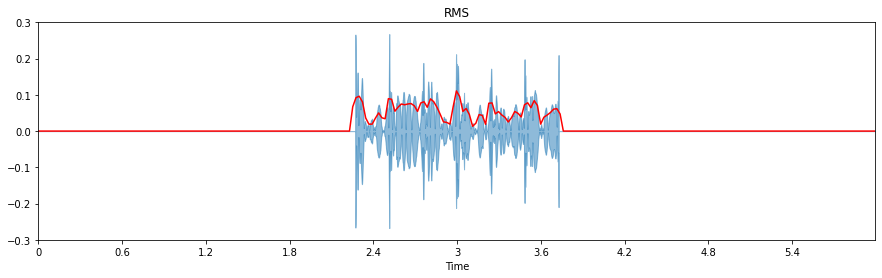

In [20]:
# Root-mean-squared energy with Librosa
FRAME_SIZE = 1024
HOP_LENGTH = 512
rms = librosa.feature.rms(sample_arr, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

# Visualise RMSE + waveform
frames = range(len(rms))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15, 4))
librosa.display.waveplot(sample_arr, alpha=0.5)
plt.plot(t, rms, color="r")
plt.ylim((-0.3, 0.3))
plt.title("RMS")
plt.show()

In [7]:
# Root-mean-squared energy from scratch
def rmse(signal, frame_size, hop_length):
    rmse = []
    
    # calculate rmse for each frame
    for i in range(0, len(signal), hop_length): 
        rmse_current_frame = np.sqrt(sum(signal[i:i+frame_size]**2) / frame_size)
        rmse.append(rmse_current_frame)
    return np.array(rmse)

FRAME_SIZE = 1024
HOP_LENGTH = 512
rms = rmse(sample_arr, FRAME_SIZE, HOP_LENGTH)

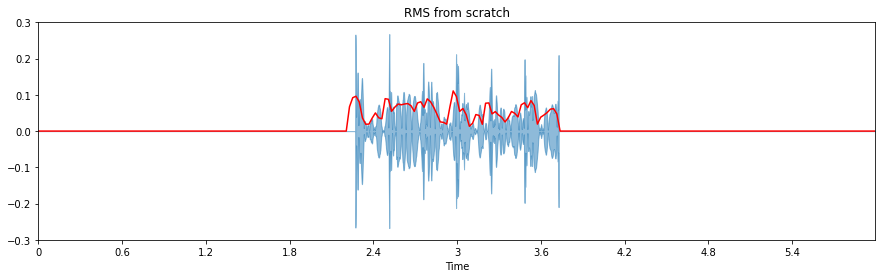

In [11]:
# Visualise RMSE + waveform
frames = range(len(rms))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15, 4))
librosa.display.waveplot(sample_arr, alpha=0.5)
plt.plot(t, rms, color="r")
plt.ylim((-0.3, 0.3))
plt.title("RMS from scratch")
plt.show()